# Politics Analysis
Marianne Aubin Le Quere
November 6th 2019

We want to know what different dimensions we are working with in our dataset. This will better allow us to see whether we are succeeding at our significance tests.

Credit to: https://github.com/kapadias/mediumposts/blob/master/nlp/published_notebooks/Introduction%20to%20Topic%20Modeling.ipynb
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0


In [1]:
# import required modules and set up environment
import os
import numpy as np
import pandas as pd

# replace file path below with your own local convokit
os.chdir('/Users/marianneaubin/Documents/Classes/CS6742/cs6742-fork')

import convokit

from convokit import Corpus, Parser, PolTracker, Transformer
import nltk

## 1. Read in data

In [2]:
# load corpus, this takes a long time so you can also use a different corpus as a test
corpus = convokit.Corpus(filename='../news-filtered-corpus')

In [3]:
# now put all utterances into a df

conv_text = []

for conv_id in corpus.conversations:
    conv = corpus.get_conversation(conv_id)
    for utt in conv.iter_utterances():
        conv_text.append(utt.text)
    
print(len(conv_text))
            

2042037


In [4]:
# create dataframe
s = pd.DataFrame(conv_text, columns=['utt_text'])

In [5]:
s.head()

,utt_text
0,
1,
2,
3,
4,


## 2. Data Cleaning
Now we clean the data to get rid of punctuation and upper/lower caase.



In [6]:
import re
# remove lowercase and strip whitespaces
#remove punctuation
s["utt_text_cleaned"] = s['utt_text'].str.replace('&gt;',' ').str.replace('&lt;',' ').str.strip().str.lower().str.replace('\.',' ').str.replace('\n',' ').str.replace('[^\w\s]','')

In [7]:
s[250:270]

,utt_text,utt_text_cleaned
250,[deleted],deleted
251,You lose many of your rights when you step int...,you lose many of your rights when you step int...
252,The courts themselves are also a protector of ...,the courts themselves are also a protector of ...
253,[deleted],deleted
254,There does not have to be a corresponding crim...,there does not have to be a corresponding crim...
255,[deleted],deleted
256,Ample evidence does not constitute a law again...,ample evidence does not constitute a law again...
257,This is the only time using a drone to drop th...,this is the only time using a drone to drop th...
258,I hate it that the people in our country ( lik...,i hate it that the people in our country like...
259,That's actually not how it works. You get in t...,thats actually not how it works you get in tr...


In [8]:
s.head()

,utt_text,utt_text_cleaned
0,,
1,,
2,,
3,,
4,,


In [9]:
## use nltk to remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))
temp_stop = set()
for i,word in enumerate(stop):
    w = re.sub(r'[^\w\s]','',word)
    temp_stop.add(w)
stop = temp_stop

s["utt_text_cleaned_no_stopwords"] = s["utt_text_cleaned"].apply(
    lambda x: [item for item in nltk.word_tokenize(x) if item not in stop])

s[250:270]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marianneaubin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,utt_text,utt_text_cleaned,utt_text_cleaned_no_stopwords
250,[deleted],deleted,[deleted]
251,You lose many of your rights when you step int...,you lose many of your rights when you step int...,"[lose, many, rights, step, courthouse]"
252,The courts themselves are also a protector of ...,the courts themselves are also a protector of ...,"[courts, also, protector, citizens, government]"
253,[deleted],deleted,[deleted]
254,There does not have to be a corresponding crim...,there does not have to be a corresponding crim...,"[corresponding, crime, fact, make, incitement,..."
255,[deleted],deleted,[deleted]
256,Ample evidence does not constitute a law again...,ample evidence does not constitute a law again...,"[ample, evidence, constitute, law, talking, wo..."
257,This is the only time using a drone to drop th...,this is the only time using a drone to drop th...,"[time, using, drone, drop, pamphlets, watch, s..."
258,I hate it that the people in our country ( lik...,i hate it that the people in our country like...,"[hate, people, country, like, politicians, law..."
259,That's actually not how it works. You get in t...,thats actually not how it works you get in tr...,"[thats, actually, works, get, trouble, whether..."


In [15]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

s['utt_text_cleaned_no_stopwords_stemmed'] = s['utt_text_cleaned_no_stopwords'].apply(
    lambda x: [stemmer.stem(item) for item in x])

s[250:270]

,utt_text,utt_text_cleaned,utt_text_cleaned_no_stopwords,utt_text_cleaned_no_stopwords_split,utt_text_cleaned_no_stopwords_stemmed
250,[deleted],deleted,[deleted],deleted,[delet]
251,You lose many of your rights when you step int...,you lose many of your rights when you step int...,"[lose, many, rights, step, courthouse]",lose many rights step courthouse,"[lose, mani, right, step, courthous]"
252,The courts themselves are also a protector of ...,the courts themselves are also a protector of ...,"[courts, also, protector, citizens, government]",courts also protector citizens government,"[court, also, protector, citizen, govern]"
253,[deleted],deleted,[deleted],deleted,[delet]
254,There does not have to be a corresponding crim...,there does not have to be a corresponding crim...,"[corresponding, crime, fact, make, incitement,...",corresponding crime fact make incitement crime...,"[correspond, crime, fact, make, incit, crime, ..."
255,[deleted],deleted,[deleted],deleted,[delet]
256,Ample evidence does not constitute a law again...,ample evidence does not constitute a law again...,"[ample, evidence, constitute, law, talking, wo...",ample evidence constitute law talking would de...,"[ampl, evid, constitut, law, talk, would, deni..."
257,This is the only time using a drone to drop th...,this is the only time using a drone to drop th...,"[time, using, drone, drop, pamphlets, watch, s...",time using drone drop pamphlets watch system s...,"[time, use, drone, drop, pamphlet, watch, syst..."
258,I hate it that the people in our country ( lik...,i hate it that the people in our country like...,"[hate, people, country, like, politicians, law...",hate people country like politicians law enfor...,"[hate, peopl, countri, like, politician, law, ..."
259,That's actually not how it works. You get in t...,thats actually not how it works you get in tr...,"[thats, actually, works, get, trouble, whether...",thats actually works get trouble whether know,"[that, actual, work, get, troubl, whether, know]"


In [16]:
s['utt_text_cleaned_no_stopwords_stemmed_split'] = s['utt_text_cleaned_no_stopwords_stemmed'].apply(' '.join)

s[250:270]

,utt_text,utt_text_cleaned,utt_text_cleaned_no_stopwords,utt_text_cleaned_no_stopwords_split,utt_text_cleaned_no_stopwords_stemmed,utt_text_cleaned_no_stopwords_stemmed_split
250,[deleted],deleted,[deleted],deleted,[delet],delet
251,You lose many of your rights when you step int...,you lose many of your rights when you step int...,"[lose, many, rights, step, courthouse]",lose many rights step courthouse,"[lose, mani, right, step, courthous]",lose mani right step courthous
252,The courts themselves are also a protector of ...,the courts themselves are also a protector of ...,"[courts, also, protector, citizens, government]",courts also protector citizens government,"[court, also, protector, citizen, govern]",court also protector citizen govern
253,[deleted],deleted,[deleted],deleted,[delet],delet
254,There does not have to be a corresponding crim...,there does not have to be a corresponding crim...,"[corresponding, crime, fact, make, incitement,...",corresponding crime fact make incitement crime...,"[correspond, crime, fact, make, incit, crime, ...",correspond crime fact make incit crime crime m...
255,[deleted],deleted,[deleted],deleted,[delet],delet
256,Ample evidence does not constitute a law again...,ample evidence does not constitute a law again...,"[ample, evidence, constitute, law, talking, wo...",ample evidence constitute law talking would de...,"[ampl, evid, constitut, law, talk, would, deni...",ampl evid constitut law talk would deni freedo...
257,This is the only time using a drone to drop th...,this is the only time using a drone to drop th...,"[time, using, drone, drop, pamphlets, watch, s...",time using drone drop pamphlets watch system s...,"[time, use, drone, drop, pamphlet, watch, syst...",time use drone drop pamphlet watch system squi...
258,I hate it that the people in our country ( lik...,i hate it that the people in our country like...,"[hate, people, country, like, politicians, law...",hate people country like politicians law enfor...,"[hate, peopl, countri, like, politician, law, ...",hate peopl countri like politician law enforc ...
259,That's actually not how it works. You get in t...,thats actually not how it works you get in tr...,"[thats, actually, works, get, trouble, whether...",thats actually works get trouble whether know,"[that, actual, work, get, troubl, whether, know]",that actual work get troubl whether know


## 3. Exploratory Analysis
Check whether preprocessing was done well.

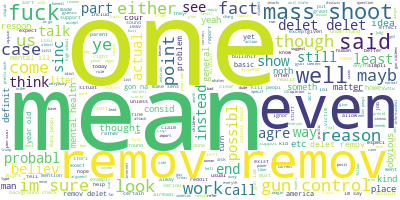

In [17]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(s['utt_text_cleaned_no_stopwords_stemmed_split'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

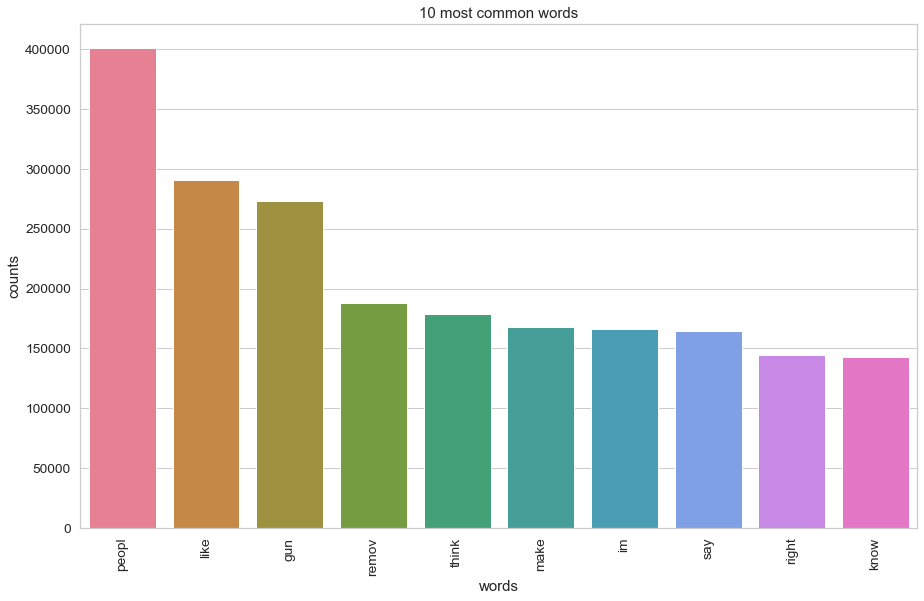

In [18]:
# Load the library with the CountVectorizer method
# this code taken from source cited at the top of this notebook
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(s['utt_text_cleaned_no_stopwords_stemmed_split'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## 4. Run LDA Model

In [19]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 8
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
money pay peopl work make job compani like free tax

Topic #1:
gun peopl shoot like use ban weapon law mass control

Topic #2:
year countri state live like war time citi peopl militari

Topic #3:
delet law drug legal illeg crime state check prison crimin

Topic #4:
right like think hes court good time im na say

Topic #5:
remov school kid peopl shoot kill year like shooter parent

Topic #6:
peopl say like think muslim right im make white thing

Topic #7:
like fuck im peopl know say shit make think thing


In [20]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_news_'+str(number_topics))

LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

with open(LDAvis_data_filepath, 'w') as f:
    pickle.dump(LDAvis_prepared, f)

LDAvis_prepared

/Users/marianneaubin/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


TypeError: write() argument must be str, not bytes

In [21]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.110523  0.024353       1        1  19.077517
6     -0.065784  0.084173       2        1  19.002931
1      0.048189 -0.027589       3        1  15.416416
2      0.013256 -0.010551       4        1  12.089157
0      0.020631  0.074093       5        1  11.050673
5     -0.110024 -0.219825       6        1   9.628305
4     -0.065876  0.108241       7        1   8.513453
3      0.270130 -0.032895       8        1   5.221547, topic_info=       Category           Freq        Term          Total  loglift  logprob
152930  Default  273956.000000         gun  273956.000000  30.0000  30.0000
258329  Default  183998.000000       remov  183998.000000  29.0000  29.0000
116498  Default  134396.000000       delet  134396.000000  28.0000  28.0000
185151  Default   90359.000000         law   90359.000000  27.0000  27.0000
268495  Default   70674.000000      school   70674.000000  26.0000  26.0000
274152  Default   96089.000000       shoot   96089.000000  25.0000  25.0000
181351  Default   62233.000000         kid   62233.000000  24.0000  24.0000
202546  Default   43494.000000       money   43494.000000  23.0000  23.0000
236675  Default   39527.000000         pay   39527.000000  22.0000  22.0000
186209  Default   40313.000000       legal   40313.000000  21.0000  21.0000
111150  Default   44252.000000       crime   44252.000000  20.0000  20.0000
181589  Default   79644.000000        kill   79644.000000  19.0000  19.0000
123840  Default   23065.000000        drug   23065.000000  18.0000  18.0000
169243  Default   32251.000000       illeg   32251.000000  17.0000  17.0000
205739  Default   39930.000000      muslim   39930.000000  16.0000  16.0000
283151  Default   71158.000000       state   71158.000000  15.0000  15.0000
317764  Default   40536.000000      weapon   40536.000000  14.0000  14.0000
324879  Default   94793.000000        year   94793.000000  13.0000  13.0000
40134   Default   41912.000000         ban   41912.000000  12.0000  12.0000
274169  Default   32936.000000     shooter   32936.000000  11.0000  11.0000
195122  Default   43663.000000        mass   43663.000000  10.0000  10.0000
109727  Default   70099.000000     countri   70099.000000   9.0000   9.0000
256402  Default   32894.000000      reddit   32894.000000   8.0000   8.0000
88832   Default   23679.000000     compani   23679.000000   7.0000   7.0000
138114  Default   31272.000000     firearm   31272.000000   6.0000   6.0000
210056  Default   40034.000000        news   40034.000000   5.0000   5.0000
235541  Default   23760.000000      parent   23760.000000   4.0000   4.0000
82932   Default   44633.000000     comment   44633.000000   3.0000   3.0000
274665  Default   27390.000000        shot   27390.000000   2.0000   2.0000
261345  Default  143509.000000       right  143509.000000   1.0000   1.0000
...         ...            ...         ...            ...      ...      ...
124039   Topic8    4451.882526       drunk    5463.353430   2.7476  -5.8016
115022   Topic8    2847.931619      dealer    3317.672831   2.7997  -6.2483
129451   Topic8    9692.792817      enforc   14040.358689   2.5818  -5.0235
176735   Topic8    7517.341739        jail   10574.027138   2.6112  -5.2777
292569   Topic8    7083.009351        test   10032.832400   2.6042  -5.3372
169243   Topic8   18693.271223       illeg   32251.019989   2.4070  -4.3667
186209   Topic8   21515.519659       legal   40313.127346   2.3245  -4.2261
123621   Topic8    4335.954358      driver    5827.613100   2.6567  -5.8280
185151   Topic8   35243.342510         law   90359.288847   2.0109  -3.7326
244341   Topic8    3386.450099     possess    4482.526406   2.6720  -6.0751
34566    Topic8    7620.932214      arrest   12939.253978   2.4230  -5.2640
59145    Topic8   10441.614735       charg   19594.469117   2.3229  -4.9491
111308   Topic8   11248.023654      crimin   22057.498707   2.2789  -4.87